In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
hbo = pd.read_csv("data/hbomax-titles.csv")
netflix = pd.read_csv("data/netflix-titles.csv")
prime = pd.read_csv("data/prime-titles.csv")
disney = pd.read_csv("data/disney-titles.csv")
paramount = pd.read_csv("data/paramount-titles.csv")
apple = pd.read_csv("data/apple-titles.csv")

hbo['service'] = 'HBO'
netflix['service'] = 'NETFLIX'
prime['service'] = 'PRIME'
disney['service'] = 'DISNEY'
paramount['service'] = 'PARAMOUNT'
apple['service'] = 'APPLE'

In [4]:
import functools
from datetime import datetime
import plotly.express as px

In [13]:
def get_entertainment(head : int, genres=[], only_movies=True, nation=None, newer_content=0, year_bias=True, dropna=True, age_restrictions=[]):

    # concatenated in order of prefered streaming format
    df = pd.concat([netflix, prime, hbo, apple, paramount])
    df.drop_duplicates(inplace=True, subset=['id'], keep='first')
    df['age_certification'].replace(np.nan, 'Unrated', inplace=True)
    
    if only_movies:
        df = df[df.type == 'MOVIE']
    if newer_content:
        try:
            assert(type(newer_content) == int or type(newer_content) == float)
            df = df.loc[df.release_year > datetime.now().year - newer_content]
        except AssertionError:
            print('newer_content must be a number')
    if nation:
        df = df.loc[df.production_countries.apply(lambda x: nation in x)]
    if genres:
        df = df.loc[df.genres.apply(lambda x: np.all([genre in x for genre in genres]))]
    if age_restrictions:
        for age_restriction in age_restrictions:
            df = df[(df.age_certification != age_restriction)]
    
    criterion = []
    criterion.append(np.log(df.imdb_votes))
    criterion.append(df.imdb_score)
    if year_bias:
        criterion.append(df.release_year/datetime.now().year)

    df['adjusted_score'] = functools.reduce(lambda x, y: x * y, criterion)
    df.drop(columns=['seasons', 'imdb_id', 'type', 'id', 'runtime', 'tmdb_popularity', 'tmdb_score'], axis=1, inplace=True)

    if dropna:
        df.dropna(subset='adjusted_score', inplace=True)
    df.sort_values(ascending=False, by='adjusted_score', inplace=True)
    df['rank'] = range(1, df.shape[0]+1)
    if head:
        return df.head(head)
    else:
        return df


In [16]:
all_genres = ['action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
              'european', 'family', 'fantasy', 'history', 'horror', 'music',
              'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western'] 
nations = ['AE', 'AF', 'AL', 'AN', 'AO', 'AQ', 'AR', 'AT', 'AU', 'AZ', 'BA',
             'BD', 'BE', 'BF', 'BG', 'BM', 'BO', 'BR', 'BS', 'BT', 'BY', 'CA',
             'CD', 'CF', 'CH', 'CI', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CY',
             'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI',
             'FJ', 'FM', 'FO', 'FR', 'GB', 'GD', 'GE', 'GH', 'GL', 'GR', 'GT',
             'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IO', 'IQ', 'IR',
             'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KN', 'KR', 'KW',
             'KZ', 'LB', 'LI', 'LK', 'LT', 'LU', 'LV', 'MA', 'MC', 'MK', 'MN',
             'MT', 'MU', 'MW', 'MX', 'MY', 'NA', 'NC', 'NG', 'NI', 'NL', 'NO',
             'NP', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PH', 'PK', 'PL', 'PR', 'PS',
             'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SB', 'SE', 'SG',
             'SI', 'SK', 'SN', 'SO', 'SU', 'SV', 'SY', 'SZ', 'TC', 'TH', 'TN',
             'TR', 'TT', 'TW', 'TZ', 'UA', 'US', 'UY', 'UZ', 'VA', 'VE', 'VN',
             'VU', 'XC', 'XK', 'YU', 'ZA', 'ZW']


Movies containing keywords: 
(In order of score)

0 The Shawshank Redemption
1 The Dark Knight
2 The Lord of the Rings: The Return of the King
3 Pulp Fiction
4 Forrest Gump
5 The Lord of the Rings: The Fellowship of the Ring
6 The Lord of the Rings: The Two Towers
7 The Matrix
8 Interstellar
9 Se7en
10 Saving Private Ryan
11 The Silence of the Lambs
12 The Dark Knight Rises
13 GoodFellas
14 Gladiator
15 The Departed
16 Django Unchained
17 12 Angry Men
18 Joker
19 Terminator 2: Judgment Day
20 One Flew Over the Cuckoo's Nest
21 Memento
22 The Usual Suspects
23 The Wolf of Wall Street
24 Batman Begins
25 Spirited Away
26 City of God
27 Braveheart
28 Eternal Sunshine of the Spotless Mind
29 Raiders of the Lost Ark
30 Reservoir Dogs
31 Good Will Hunting
32 No Country for Old Men
33 Jai Bhim
34 The Sixth Sense
35 Gone Girl
36 Catch Me If You Can
37 A Clockwork Orange
38 The Grand Budapest Hotel
39 Top Gun: Maverick
40 Taxi Driver
41 Indiana Jones and the Last Crusade
42 Prisoners
43 The Ter

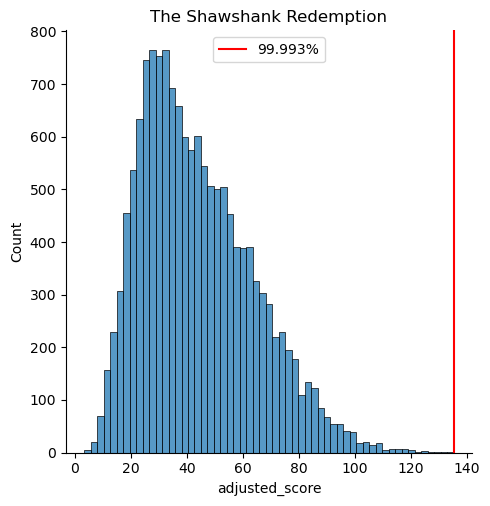

In [26]:
# concatenated in order of prefered streaming format
df = get_entertainment(0, only_movies=True)



keyword = ""


filtered = df.loc[df.title.apply(lambda x: keyword in x.lower())]
print(f"Movies containing keywords: {keyword}\n(In order of score)\n")
for i, value in enumerate(filtered.title.values):
    print(i, value)

i = 0


sns.displot(df.adjusted_score)
plt.axvline(x=filtered.adjusted_score.iloc[i], color='red', label=f"{round(100*(1-float(df.loc[df.title == filtered.title.iloc[i]]['rank'].iloc[0]/len(df))), 3)}%")
plt.title(filtered.title.iloc[i])
plt.legend()
plt.show()


In [37]:
entertainment = get_entertainment(0, genres=[], nation=None, only_movies=True, newer_content=0, age_restrictions=[])

fig = px.scatter(entertainment, x='rank', y='adjusted_score',
                 title=f'Top {entertainment.shape[0]} Entertainment Scores',
                 labels={'adjusted_score': 'score',
                         'age_certification': 'rating'},
                 hover_name='title', hover_data={'adjusted_score': True, 'title': False, 'service' : True, 'genres' : True, 'release_year' : True},
                 color='age_certification', template='plotly_white', width=1000, height=600)
fig.update_layout(
    xaxis=dict(showticklabels=False),
    yaxis=dict(titlefont=dict(size=20)),
    font=dict(size=16, family='Arial'),
    title=dict(x=0.5, y=0.95, font=dict(size=28))
)
fig.show()


In [31]:
import IPython.display as ipd
top_20 = entertainment[['title', 'release_year',
                        'genres', 'service', 'imdb_score',
                        'adjusted_score']].copy()
ipd.display(top_20)
top_20.index = entertainment['rank']
with open('data.html', 'w') as f:
    f.write("<h1>TOP 20 PG-13 Movies of the past 20 years</h1>")
    f.write(top_20.to_html())


,title,release_year,genres,service,imdb_score,adjusted_score
201,The Dark Knight,2008,"['drama', 'thriller', 'action', 'crime']",NETFLIX,9.0,132.238594
1781,Interstellar,2014,"['drama', 'thriller', 'scifi']",PARAMOUNT,8.6,123.645882
1538,The Dark Knight Rises,2012,"['drama', 'thriller', 'action', 'crime']",HBO,8.4,119.963757
1047,Batman Begins,2005,"['drama', 'crime', 'action']",HBO,8.2,115.502262
2966,Top Gun: Maverick,2022,"['drama', 'action']",PARAMOUNT,8.3,109.534304
...,...,...,...,...,...,...
10353,Paralyzed,2021,['drama'],PRIME,3.4,11.437487
4571,Trigger,2014,"['action', 'scifi', 'drama']",PRIME,3.2,11.326499
7050,¿En dónde están los ladrones?,2017,['comedy'],PRIME,3.8,10.260070
1005,Ouija: Origin of Evil,2016,"['horror', 'thriller', 'drama']",NETFLIX,4.9,9.501967


/home/javkt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/javkt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/javkt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/javkt/anac

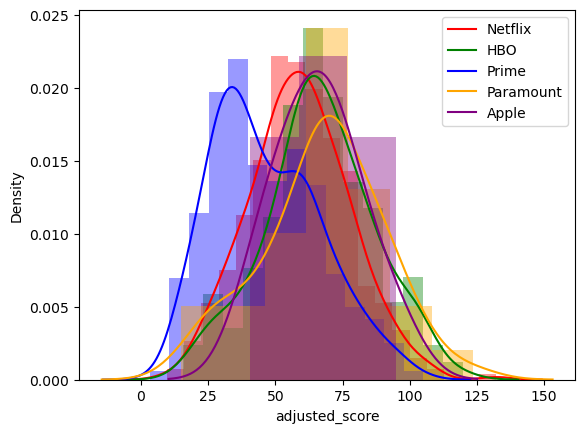

In [34]:
hbo_ = entertainment[entertainment.service == 'HBO']
netflix_ = entertainment[entertainment.service == 'NETFLIX']
prime_ = entertainment[entertainment.service == 'PRIME']
paramount_ = entertainment[entertainment.service == 'PARAMOUNT']
apple_ = entertainment[entertainment.service == 'APPLE']
sns.distplot(netflix_.adjusted_score, color='red')
sns.distplot(hbo_.adjusted_score, color='green')
sns.distplot(prime_.adjusted_score, color='blue')
sns.distplot(paramount_.adjusted_score, color='orange')
sns.distplot(apple_.adjusted_score, color='purple')
plt.legend(['Netflix', 'HBO',  'Prime', "Paramount", "Apple"])
plt.show()

In [41]:
entertainment.to_csv('filtered.csv')